## 1. 데이터 불러오기
- data 폴더 안에 있는 jeju_card.csv 파일을 DataFrame으로 불러옵시다.
## 2. 데이터 탐색 및 전처리
- 데이터 개수, 컬럼별 데이터 타입, 통계 정보, 결측값 존재 여부 등을 확인해 보세요.
- 각 컬럼이 어떤 값들로 이루어져 있는지 확인해 보세요.
- 2017년과 2018년의 데이터만 추출해 주세요.
## 3. 데이터 분석
- 2017년과 2018년, 두 연도 사이에 어떤 차이가 있나요? 왜 그런 차이가 나는지도 한번 확인해 보세요.
- 이용자수, 소비금액, 1회당 소비금액을 비교해 보세요.
- 연령대별로 어떤 업종에 많은 금액을 지출하는지 확인해 보세요.
- 연령대별로 연월별 카드 이용 추이를 확인해 보세요.

In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import platform
%matplotlib inline

In [181]:
# 사용자 운영체제 확인
platform.system()
# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

In [182]:
df = pd.read_csv('data/jeju_card.csv')
df

,시도명,시군구명,지역구분,업종명,이용자 구분,연령대,성별,연월,이용자수,이용횟수,이용금액
0,제주도,제주시,읍면,유흥,제주도민,60대이상,여,2018-12,23,29,4240100
1,제주도,제주시,읍면,유흥,제주도민,60대이상,남,2018-12,114,190,27414000
2,제주도,제주시,읍면,유흥,제주도민,50대,여,2018-12,52,71,6848000
3,제주도,제주시,읍면,유흥,제주도민,50대,남,2018-12,259,458,91468500
4,제주도,제주시,읍면,유흥,제주도민,40대,여,2018-12,77,99,10021600
...,...,...,...,...,...,...,...,...,...,...,...
19568,제주도,서귀포시,도심,교통,내국인관광객,40대,남,2016-09,1778,2059,79696179
19569,제주도,서귀포시,도심,교통,내국인관광객,30대,여,2016-09,1441,1543,52066479
19570,제주도,서귀포시,도심,교통,내국인관광객,30대,남,2016-09,2358,2606,87972936
19571,제주도,서귀포시,도심,교통,내국인관광객,20대,여,2016-09,731,765,22788256


In [183]:
# 데이터 개수 확인
df.shape

(19573, 11)

In [184]:
# 컬럼별 데이터 타입 확인
df.dtypes

시도명       object
시군구명      object
지역구분      object
업종명       object
이용자 구분    object
연령대       object
성별        object
연월        object
이용자수       int64
이용횟수       int64
이용금액       int64
dtype: object

In [185]:
# 통계 정보 확인
df.describe()

,이용자수,이용횟수,이용금액
count,19573.000000,19573.000000,1.957300e+04
mean,2987.681347,5980.462525,2.100849e+08
std,5331.172895,13623.951410,3.921408e+08
min,1.000000,1.000000,1.000000e+03
25%,254.000000,371.000000,1.765947e+07
50%,972.000000,1376.000000,7.142090e+07
75%,3169.000000,5710.000000,2.169743e+08
max,40329.000000,149274.000000,3.213235e+09


In [186]:
# 결측값 존재 여부 확인
df.isnull().sum()

시도명       0
시군구명      0
지역구분      0
업종명       0
이용자 구분    0
연령대       0
성별        0
연월        0
이용자수      0
이용횟수      0
이용금액      0
dtype: int64

In [187]:
# 2017, 2018년도 데이터 추출
df = df[df['연월'].str.contains('2017|2018')]
df

,시도명,시군구명,지역구분,업종명,이용자 구분,연령대,성별,연월,이용자수,이용횟수,이용금액
0,제주도,제주시,읍면,유흥,제주도민,60대이상,여,2018-12,23,29,4240100
1,제주도,제주시,읍면,유흥,제주도민,60대이상,남,2018-12,114,190,27414000
2,제주도,제주시,읍면,유흥,제주도민,50대,여,2018-12,52,71,6848000
3,제주도,제주시,읍면,유흥,제주도민,50대,남,2018-12,259,458,91468500
4,제주도,제주시,읍면,유흥,제주도민,40대,여,2018-12,77,99,10021600
...,...,...,...,...,...,...,...,...,...,...,...
16702,제주도,서귀포시,도심,교통,내국인관광객,40대,남,2017-01,1891,2241,101651320
16703,제주도,서귀포시,도심,교통,내국인관광객,30대,여,2017-01,1033,1138,36637253
16704,제주도,서귀포시,도심,교통,내국인관광객,30대,남,2017-01,1570,1922,85201203
16705,제주도,서귀포시,도심,교통,내국인관광객,20대,여,2017-01,593,631,18802900


In [188]:
# 새로운 연도 컬럼 추가
df['연도'] = df['연월'].str.split('-').str[0]
df

C:\Users\wjd43\AppData\Local\Temp\ipykernel_12116\1918993470.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['연도'] = df['연월'].str.split('-').str[0]


,시도명,시군구명,지역구분,업종명,이용자 구분,연령대,성별,연월,이용자수,이용횟수,이용금액,연도
0,제주도,제주시,읍면,유흥,제주도민,60대이상,여,2018-12,23,29,4240100,2018
1,제주도,제주시,읍면,유흥,제주도민,60대이상,남,2018-12,114,190,27414000,2018
2,제주도,제주시,읍면,유흥,제주도민,50대,여,2018-12,52,71,6848000,2018
3,제주도,제주시,읍면,유흥,제주도민,50대,남,2018-12,259,458,91468500,2018
4,제주도,제주시,읍면,유흥,제주도민,40대,여,2018-12,77,99,10021600,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
16702,제주도,서귀포시,도심,교통,내국인관광객,40대,남,2017-01,1891,2241,101651320,2017
16703,제주도,서귀포시,도심,교통,내국인관광객,30대,여,2017-01,1033,1138,36637253,2017
16704,제주도,서귀포시,도심,교통,내국인관광객,30대,남,2017-01,1570,1922,85201203,2017
16705,제주도,서귀포시,도심,교통,내국인관광객,20대,여,2017-01,593,631,18802900,2017


Text(0, 0.5, '이용금액(억)')

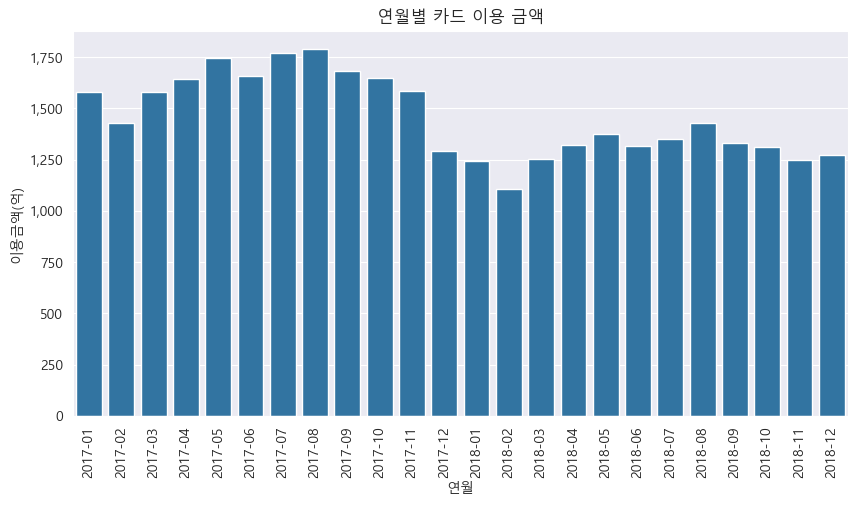

In [189]:
# 연월별로 모으기 위해 groupby
groupby_ym = df.groupby('연월').sum(numeric_only=True).reset_index()
# 그래프 그리기
sns.barplot(data=groupby_ym, x='연월', y='이용금액')
# x축 값 90도 회전
plt.xticks(rotation=90)
# 그래프 제목
plt.title('연월별 카드 이용 금액')
# y축 단위 변경
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('이용금액(억)')

In [190]:
# 연령대 컬럼 데이터 정제
df.loc[df['연령대'] == '20 미만', '연령대'] = '20대미만'
df['연령대'].unique()

array(['60대이상', '50대', '40대', '30대', '20대미만', '20대'], dtype=object)

Text(0, 0.5, '이용금액(억)')

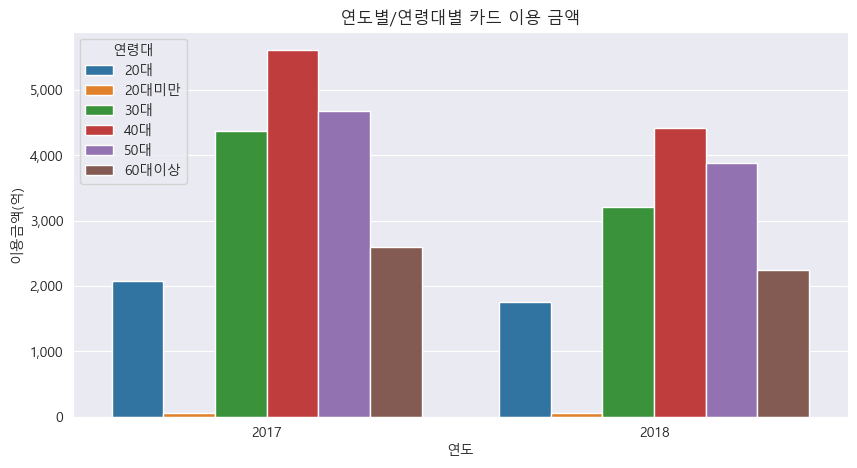

In [191]:
# 연도, 연령대 groupby
groupby_ym_age = df.groupby(['연도', '연령대']).sum(numeric_only=True).reset_index()
# 그래프 그리기
sns.barplot(data=groupby_ym_age, x='연도', y='이용금액', hue='연령대')
# 그래프 제목
plt.title('연도별/연령대별 카드 이용 금액')
# y축 단위 변경
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('이용금액(억)')

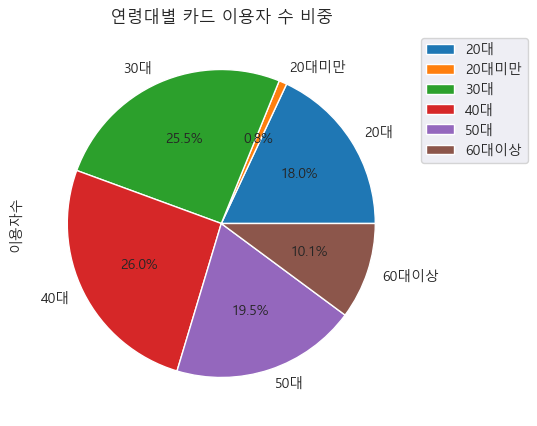

In [201]:
# 연령대별 이용자 수 시각화
groupby_age = df.groupby('연령대').sum(numeric_only=True).reset_index()
groupby_age.plot(kind='pie', y='이용자수', labels=groupby_age['연령대'], autopct='%.1f%%')
plt.title('연령대별 카드 이용자 수 비중')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

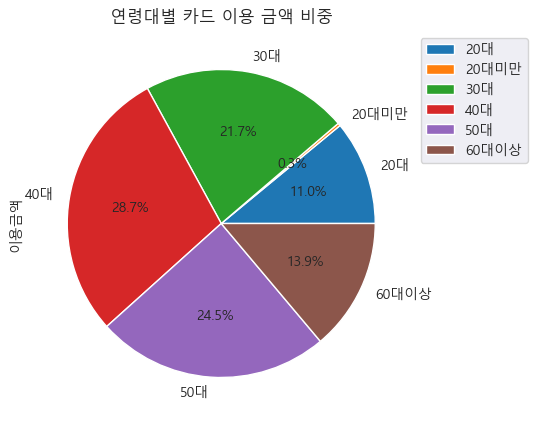

In [199]:
# 연령대별 이용금액 시각화
groupby_age.plot(kind='pie', y='이용금액', labels=groupby_age['연령대'], autopct='%.1f%%')
plt.title('연령대별 카드 이용 금액 비중')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

Text(0.5, 1.0, '연령대별 인당 카드 이용 금액')

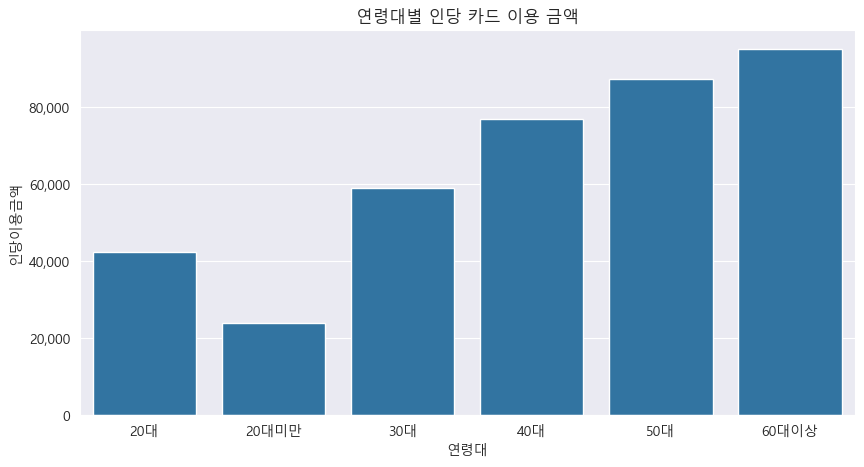

In [203]:
# 연령대별 인당 이용금액
groupby_age['인당이용금액'] = groupby_age['이용금액'] / groupby_age['이용자수']
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
sns.barplot(data=groupby_age, x='연령대', y='인당이용금액')
plt.title('연령대별 인당 카드 이용 금액')

C:\Users\wjd43\AppData\Local\Temp\ipykernel_12116\1483016461.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby_age_market = df.groupby(['연령대', '업종명']).sum(numeric_only=True).reset_index()


Text(0, 0.5, '이용금액(억)')

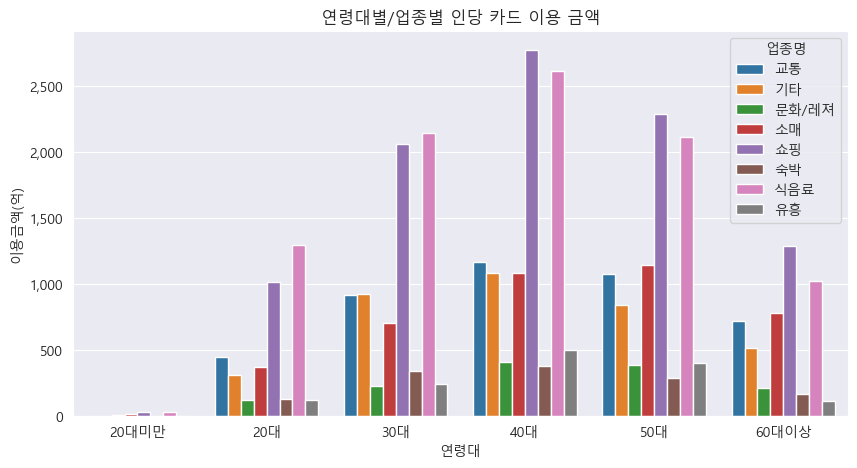

In [207]:
# 연령대별/업종별 이용 금액 시각화
groupby_age_market = df.groupby(['연령대', '업종명']).sum(numeric_only=True).reset_index()
# 카테고리 리스트 순으로 정렬
# pd.Categorical(시리즈, categories=[카테고리리스트], ordered = True)
groupby_age_market['연령대'] = pd.Categorical(groupby_age_market['연령대'], categories=['20대미만', '20대', '30대', '40대', '50대', '60대이상'], ordered=True)
sns.barplot(data=groupby_age_market, x='연령대', y='이용금액', hue='업종명')
plt.title('연령대별/업종별 인당 카드 이용 금액')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('이용금액(억)')

C:\Users\wjd43\AppData\Local\Temp\ipykernel_12116\3956906883.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby_age_ym = df.groupby(['연령대', '연월']).sum(numeric_only=True).reset_index()


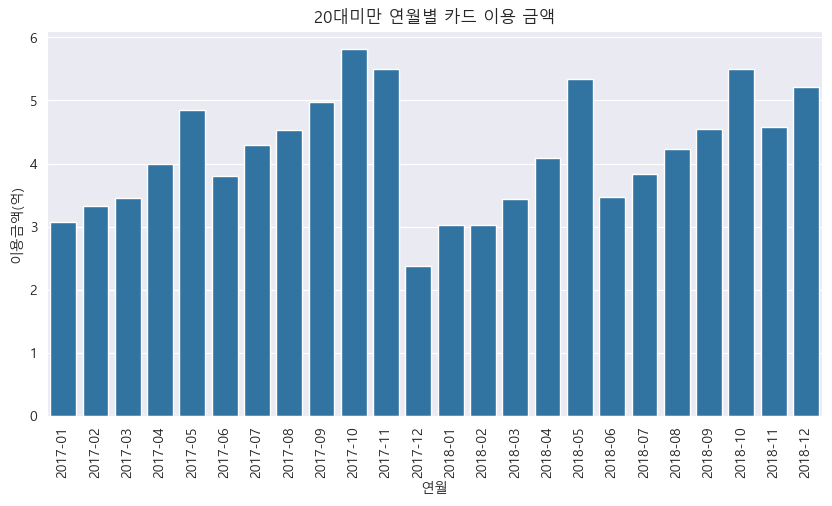

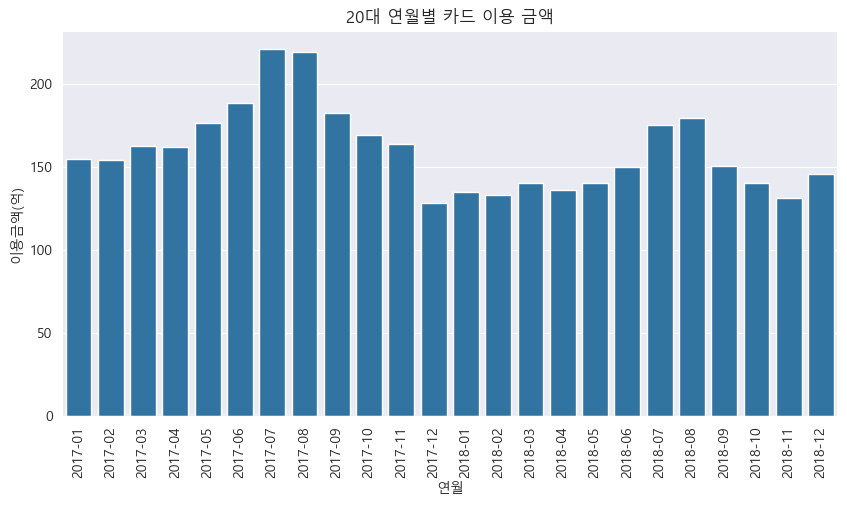

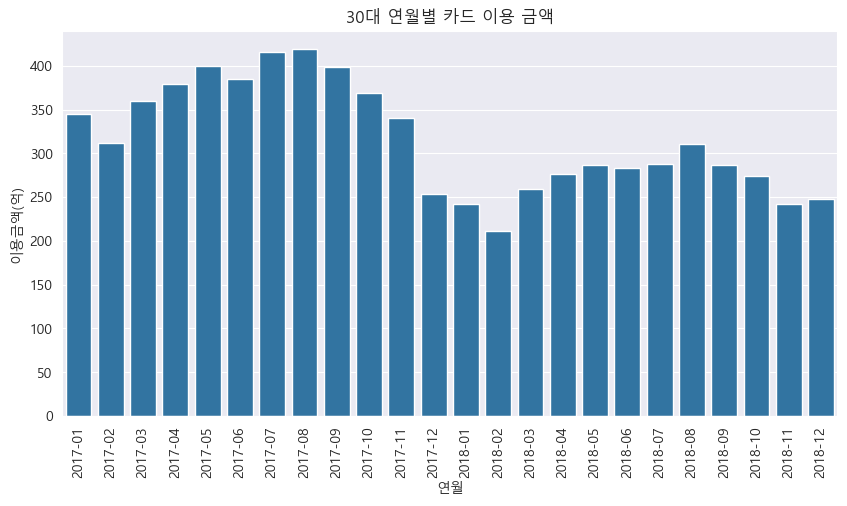

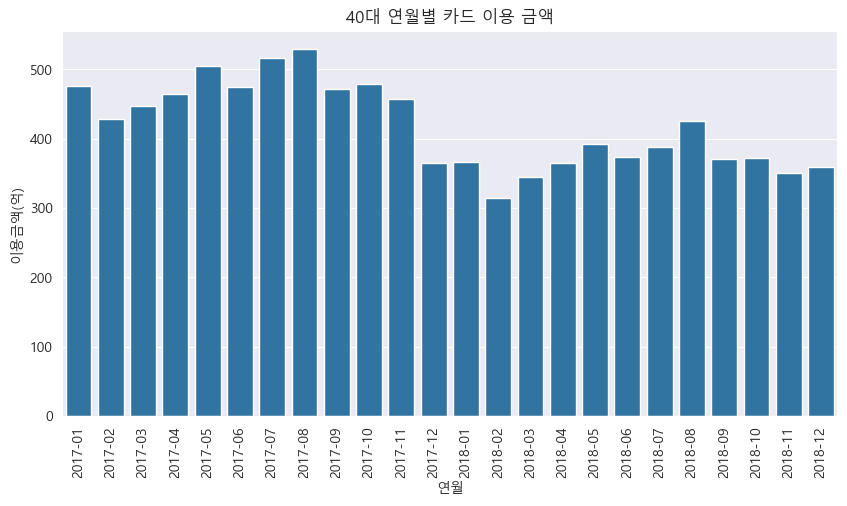

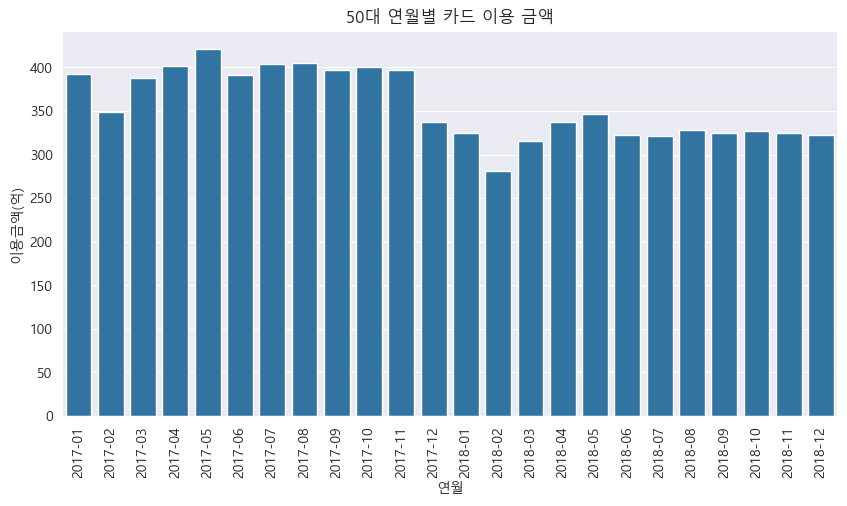

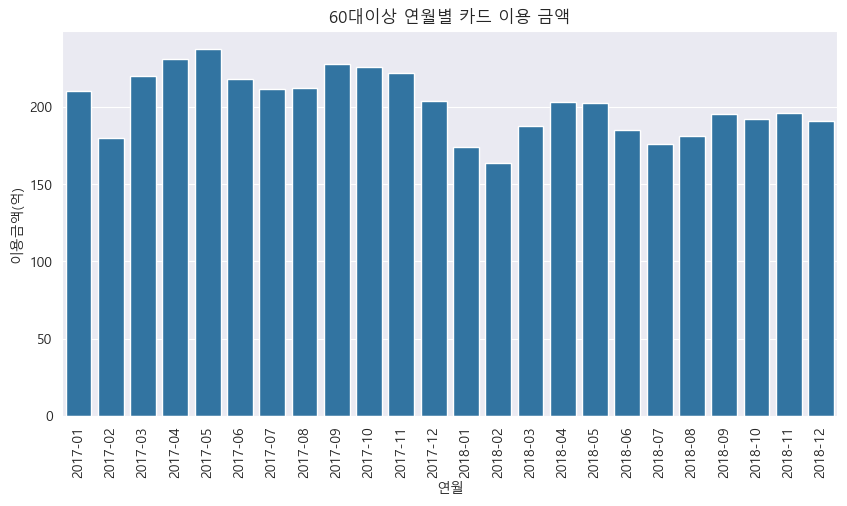

In [209]:
# 연령대별로 연월별 카드 이용 추이
groupby_age_ym = df.groupby(['연령대', '연월']).sum(numeric_only=True).reset_index()
for age in groupby_age_ym['연령대'].unique():
    data = groupby_age_ym[groupby_age_ym['연령대'] == age]
    sns.barplot(data=data, x='연월', y='이용금액')
    plt.title(f'{age} 연월별 카드 이용 금액')
    plt.xticks(rotation=90)
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
    plt.ylabel('이용금액(억)')
    plt.show()